# Trabajo Computacional 3 - Sistemas Complejos 2018

In [115]:
# Importacion de librerias #
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
import community
import infomap
import igraph
#from infomap import infomap

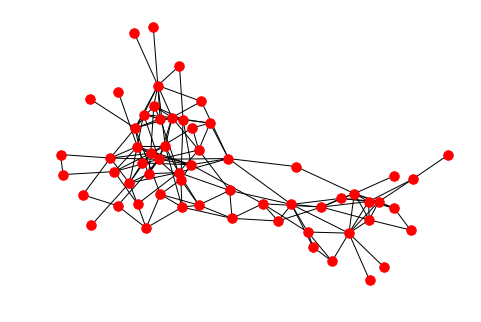

In [2]:
G=nx.read_gml('dolphins.gml')
nx.draw(G, with_labels=False, font_weight='bold',node_size=90)
plt.show()

In [4]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

data_gender=ldata('dolphinsGender.txt')
data_gender
colores=[]

# Le agregamos el atributo "genero" al grafo G
for elemento in data_gender:
    G.node[elemento[0]]['genero']=elemento[1]
    
# Creamos un vector de colores que vincula los generos (mismo orden)     
for node in G.node:
    gen = G.node[node]['genero']
    #print(node,gen)
    if gen=='f':
        colores.append('red')
    elif gen=='m':
        colores.append('blue')
    else:
        colores.append('grey')

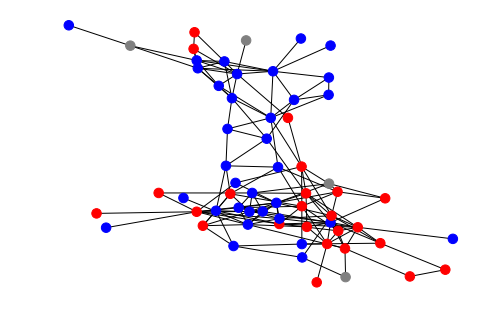

In [5]:
nx.draw(G, with_labels=False,node_color=colores, font_weight='bold',node_grouping='genero',node_size=90)
plt.show()

In [65]:
partition_louvain = community.best_partition(G)
colors = ['red','blue','yellow','grey','orange','violet']

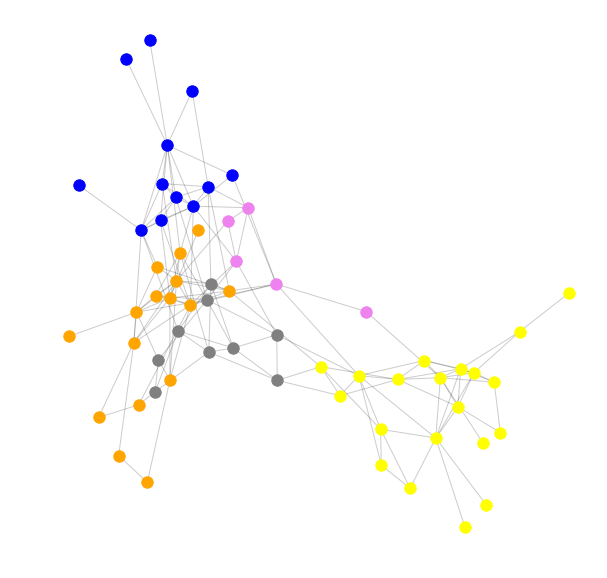

In [97]:
#drawing
plt.figure(1,figsize=(10,10)) 
size = float(len(set(partition_louvain.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 130,
                                node_color = colors[int(count)]) 

#plt.figure(1,figsize=(12,12))
nx.draw_networkx_edges(G, pos, alpha=0.2,labels=True)
plt.axis('off')

plt.show()

In [75]:
print(partition_louvain)

{u'Haecksel': 0, u'Web': 1, u'Jet': 1, u'SMN5': 0, u'DN16': 1, u'Shmuddel': 3, u'Cross': 0, u'Topless': 0, u'Beescratch': 1, u'CCL': 4, u'SN4': 3, u'MN60': 0, u'Feather': 1, u'Wave': 1, u'SN9': 3, u'Fork': 3, u'MN83': 0, u'Mus': 1, u'DN63': 1, u'DN21': 1, u'SN89': 4, u'MN23': 1, u'Stripes': 3, u'Jonah': 0, u'Zap': 4, u'Five': 0, u'Beak': 2, u'Vau': 0, u'Knit': 1, u'TSN103': 3, u'Grin': 3, u'TR82': 1, u'TR77': 2, u'Double': 4, u'Number1': 1, u'Thumper': 2, u'SN63': 3, u'Zig': 1, u'Whitetip': 3, u'Bumper': 2, u'Ripplefluke': 1, u'Notch': 1, u'Kringel': 2, u'TSN83': 3, u'SN90': 1, u'TR99': 3, u'SN96': 2, u'SN100': 4, u'TR120': 3, u'Fish': 2, u'Quasi': 1, u'Zipfel': 3, u'Hook': 3, u'Trigger': 0, u'PL': 2, u'Patchback': 0, u'Oscar': 2, u'MN105': 0, u'Scabs': 3, u'TR88': 3, u'Gallatin': 1, u'Upbang': 1}


Creamos listas con los nombres y la etiqueta de la comunidad a la cual pertenecen. 
Por ejemplo: nombres_louvain[0] es el nombre de un delfin, comunities_louvain[0] es la etiqueta correspondiente a la comunidad a la cual pertenece dicho delfin. 


In [46]:
nombres_louvain = list(partition_louvain.keys())
comunities_louvain = list(partition_louvain.values())

### Infomap

In [122]:
def as_igraph(self):
        """
        Method to export the Graph object to an igraph.Graph object
        :return: igraph.Graph
        """
        from igraph import Graph as iGraph
        as_igraph = iGraph(directed=False)
        as_igraph.add_vertices(range(self.n))
        for i in xrange(len(self.nn)):
            for neighbour in self.nn[i]:
                as_igraph.add_edges([(i, neighbour)])
        as_igraph.simplify()
        return as_igraph 

In [123]:
def infomap_igraph(ig_graph, net_file_location=None):
    """ 
        Performs igraph-infomap analysis on the nx graph
    
    Args:
        ig_graph(object): igraph graph object
        net_file_location(str): location to load graph from if not mentioned in ig_graph
        reduce_graph(bool): toggle between enable/disable reduction

    Returns:
        ig_graph: igraph object
        community.membership: result of infomap community analyis
    """

    if ig_graph is None:
        # give an option of loading a graph from .net file
        ig_graph = igraph.Graph()
        ig_graph = igraph.read(net_file_location, format="pajek")

    if ig_graph.es:
        community = ig_graph.community_infomap(edge_weights=ig_graph.es["weight"])
        codelength = community.codelength

        print "code-length:", codelength
        print "no. of communities: ", max(community.membership) + 1
        print community

        if config.DEBUGGER:
            for node in ig_graph.vs():
                print str(node.index)+"\t"+str(ig_graph.vs["id"][node.index])
                # print str(node.index)+"\t"+str(id_to_name_map[g.vs["id"][node.index]])

        # http://stackoverflow.com/questions/21976889/plotting-communities-with-python-igraph
        return ig_graph, community

    return ig_graph, None 

In [2]:
#a = as_igraph(G)
#infomap_igraph(a)
print("Test")

Test
